# Explore CREG025.L75 experiments to assess the AW subduction process over the Large FraWSC box

> ## This script allows to compute Time series for:
>> ### AWTmax, Qnet, Ice area as the southward Ice mass flux through Fram strait 

In [119]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

%matplotlib inline

In [120]:
s_year=1980 ; e_year=2015
RYEAR=str(s_year)+'-'+str(e_year)

In [121]:
CONFIG='CREG025.L75'   ; CASE=''
CONFCASE=CONFIG

In [122]:
# List of experiments names:
case_Ref='BVHNTMXD'   #; case_Ref='BCTGE27NTMX'  ;  case_Ref='BVHNTMXP' 

##### Read CREG025.L75 grid information 

In [123]:
main_dir='/net/5lpo154/export/drakkar-h3/drakkar/CONFIGS/'
grid_dir=main_dir+CONFIG+'/GRID/'

# Mask of the grid
ds_mask=xr.open_dataset(grid_dir+CONFCASE+'_byte_mask.nc')
ds_mask

# Horizontal mesh
ds_mesh_hgr=xr.open_dataset(grid_dir+CONFCASE+'_mesh_hgr.nc')
ds_mesh_hgr

# Vertical mesh
ds_mesh_zgr=xr.open_dataset(grid_dir+CONFCASE+'_mesh_zgr.nc')
ds_mesh_zgr

<xarray.Dataset>
Dimensions:       (t: 1, x: 528, y: 603, z: 75)
Dimensions without coordinates: t, x, y, z
Data variables:
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 ...
    time_counter  (t) float64 ...
    mbathy        (t, y, x) int16 ...
    misf          (t, y, x) int16 ...
    isfdraft      (t, y, x) float32 ...
    e3t_0         (t, z, y, x) float64 ...
    e3u_0         (t, z, y, x) float64 ...
    e3v_0         (t, z, y, x) float64 ...
    e3w_0         (t, z, y, x) float64 ...
    hdept         (t, y, x) float32 ...
    hdepw         (t, y, x) float32 ...
    gdept_1d      (t, z) float64 ...
    gdepw_1d      (t, z) float64 ...
    e3t_1d        (t, z) float64 ...
    e3w_1d        (t, z) float64 ...
Attributes:
    file_name:  mesh_zgr.nc
    TimeStamp:  08/08/2016 13:31:30 +0200

In [124]:
ds_grid=xr.Dataset()
ds_grid
#ds_grid['tmask2D']=(('time','z','y','x'),ds_mask['tmask'])
ds_grid['Tarea']=ds_mask['tmask'][0,0,:,:]*ds_mesh_hgr['e1t'][0,:,:]*ds_mesh_hgr['e2t'][0,:,:]
ds_grid['Farea']=ds_mask['fmask'][0,0,:,:]*ds_mesh_hgr['e1f'][0,:,:]*ds_mesh_hgr['e2f'][0,:,:]
ds_grid['tmask2D']=ds_mask['tmask'].sel(z=0).squeeze()
ds_grid.coords['gphif']=(('y','x'),ds_mesh_hgr['gphif'][0,:,:])
ds_grid.coords['glamf']=(('y','x'),ds_mesh_hgr['glamf'][0,:,:])
ds_grid.coords['gphit']=(('y','x'),ds_mesh_hgr['gphit'][0,:,:])
ds_grid.coords['glamt']=(('y','x'),ds_mesh_hgr['glamt'][0,:,:])

ds_grid
#plt.figure(figsize=(20,15))

#plt.imshow(ds_grid['Farea'],origin='bottom')

<xarray.Dataset>
Dimensions:  (x: 528, y: 603)
Coordinates:
    gphif    (y, x) float32 25.4716 25.471653 25.471708 ... 55.095528 55.02518
    glamf    (y, x) float32 -93.62534 -93.37534 ... 102.25591 102.051285
    gphit    (y, x) float32 25.359825 25.359877 25.359926 ... 55.021885 54.95175
    glamt    (y, x) float32 -93.75031 -93.50031 ... 102.193756 101.988945
Dimensions without coordinates: x, y
Data variables:
    Tarea    (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    Farea    (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    tmask2D  (y, x) int8 ...

#### Define the WSC box limited to the Fram strait at its northern edge

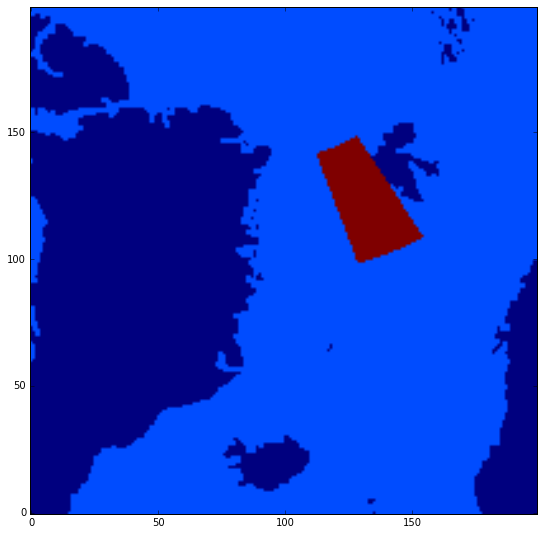

In [125]:
# Identify the area with boolean 
FraWSC_msk=(ds_grid.coords['gphit']>75.)&(ds_grid.coords['gphit']<81.)& \
        (ds_grid.coords['glamt']>0.) & (ds_grid.coords['glamt']<13.)

# Then define a mask with either 0 or 1 values
ds_grid['FraWSC_msk']=xr.where(FraWSC_msk,1.,0.)

ds_grid
# Control the location of the mask
plt.figure(figsize=(20,10))
#plt.subplot(121)
#plt.imshow(NorSeas_msk,origin='botom')
plt.subplot(122)
ds_grid['FraWSC_loc']=xr.where(FraWSC_msk,5.,ds_grid['tmask2D'][:,:])
plt.imshow(ds_grid['FraWSC_loc'][200:400,200:400],origin='botom')

dosavefig=True
plt.savefig('./FIGURES/LargeFraWSC_boxLoc.pdf')
dosavefig=False


# Heat fluxes diagnostics 

In [126]:
# Ref experiment data
DATA_PATH='/net/5lpo154/export/drakkar-h3/drakkar/CONFIGS/'+CONFIG+'/'+'CREG025.L75-'+case_Ref+'/'+RYEAR+'/'
ds_RefQ=xr.open_mfdataset(DATA_PATH+'CREG025.L75-'+case_Ref+'_y*m*.1m_flxT.nc',autoclose=True)
monthly_time=pd.date_range(start=str(s_year)+'-01-01',end=str(e_year)+'-12-31',freq='M')


In [127]:
# Ref experiment data
DATA_PATH='/net/5lpo154/export/drakkar-h3/drakkar/CONFIGS/'+CONFIG+'/'+'CREG025.L75-'+case_Ref+'/'+RYEAR+'/'
ds_RefIce=xr.open_mfdataset(DATA_PATH+'CREG025.L75-'+case_Ref+'_y*m*.1m_icemod.nc',autoclose=True)

In [128]:
ds_RefIce

<xarray.Dataset>
Dimensions:       (ncatice: 5, time_counter: 432, x: 528, y: 603)
Coordinates:
  * ncatice       (ncatice) float32 1.0 2.0 3.0 4.0 5.0
  * time_counter  (time_counter) datetime64[ns] 1980-01-16T11:58:56 ... 2015-12-16T12:01:04
Dimensions without coordinates: x, y
Data variables:
    nav_lon       (time_counter, y, x) float32 dask.array<shape=(432, 603, 528), chunksize=(1, 603, 528)>
    nav_lat       (time_counter, y, x) float32 dask.array<shape=(432, 603, 528), chunksize=(1, 603, 528)>
    sivolu        (time_counter, y, x) float32 dask.array<shape=(432, 603, 528), chunksize=(1, 603, 528)>
    snvolu        (time_counter, y, x) float32 dask.array<shape=(432, 603, 528), chunksize=(1, 603, 528)>
    sitemp        (time_counter, y, x) float32 dask.array<shape=(432, 603, 528), chunksize=(1, 603, 528)>
    sisali        (time_counter, y, x) float32 dask.array<shape=(432, 603, 528), chunksize=(1, 603, 528)>
    siages        (time_counter, y, x) float32 dask.array<shape=(43

### Mean Surface Heat flux & area ice in the FraWSC area

In [129]:
!date

Mon Jan 14 15:03:36 UTC 2019


In [130]:
ds_diags=xr.Dataset() 
ds_diags['are_FraWSC']=ds_grid['Tarea']*ds_grid['FraWSC_msk']

ds_diags['Ref_Qt_FraWSC']=ds_RefQ['hfxout']*ds_diags['are_FraWSC']
ds_diags['Ref_Qt_FraWSC_meanTiSe']=ds_diags['Ref_Qt_FraWSC'].sum(dim=('y','x'))/ds_diags['are_FraWSC'].sum(dim=('y','x'))
ds_diags['Ref_Qtdxdy_FraWSC_meanTiSe']=ds_diags['Ref_Qt_FraWSC'].sum(dim=('y','x'))

ds_diags['Ref_Icearea_FraWSC']=ds_RefIce['siconc']*ds_diags['are_FraWSC']
ds_diags['Ref_Icearea_FraWSC_meanTiSe']=ds_diags['Ref_Icearea_FraWSC'].sum(dim=('y','x'))
ds_diags

<xarray.Dataset>
Dimensions:                      (time_counter: 432, x: 528, y: 603)
Coordinates:
    gphif                        (y, x) float32 25.4716 25.471653 ... 55.02518
    glamf                        (y, x) float32 -93.62534 ... 102.051285
    gphit                        (y, x) float32 25.359825 25.359877 ... 54.95175
    glamt                        (y, x) float32 -93.75031 ... 101.988945
  * time_counter                 (time_counter) datetime64[ns] 1980-01-16T11:58:56 ... 2015-12-16T12:01:04
Dimensions without coordinates: x, y
Data variables:
    are_FraWSC                   (y, x) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    Ref_Qt_FraWSC                (time_counter, y, x) float64 dask.array<shape=(432, 603, 528), chunksize=(1, 603, 528)>
    Ref_Qt_FraWSC_meanTiSe       (time_counter) float64 dask.array<shape=(432,), chunksize=(1,)>
    Ref_Qtdxdy_FraWSC_meanTiSe   (time_counter) float64 dask.array<shape=(432,), chunksize=(1,)>
    Ref_Icearea_FraWSC           (time_c

In [131]:
!date

Mon Jan 14 15:03:37 UTC 2019


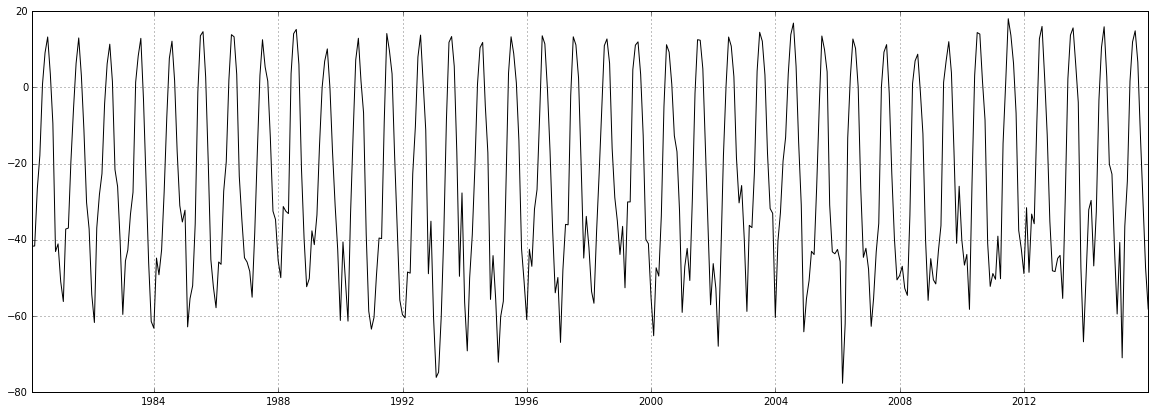

In [132]:
plt.figure(figsize=(20,15))
plt.subplot(211)
plt.plot(monthly_time,ds_diags['Ref_Qtdxdy_FraWSC_meanTiSe']*1e-12, 'k', label='Qtdxdy')
plt.grid(True)

ds_ncout=xr.Dataset()
ds_ncout['Ref_Qtdxdy_FraWSC_meanTiSe']=(('time'),ds_diags['Ref_Qtdxdy_FraWSC_meanTiSe'])
ds_ncout.to_netcdf('./NETCDF/BOX-LargeFraWSC/'+case_Ref+'_y'+RYEAR+'_TiSe_NetHeatQt_LargeFraWSC.nc', unlimited_dims={'time':True})

### AWTmax calculation in the  WSC box

In [133]:
!date

Mon Jan 14 15:14:47 UTC 2019


In [134]:
# Ref experiment data
DATA_PATH='/net/5lpo154/export/drakkar-h3/drakkar/CONFIGS/'+CONFIG+'/'+'CREG025.L75-'+case_Ref+'/'+RYEAR+'/'
ds_RefgT=xr.open_mfdataset(DATA_PATH+'CREG025.L75-'+case_Ref+'_y*m*.1m_gridT.nc',autoclose=True)
ds_RefgT

<xarray.Dataset>
Dimensions:       (deptht: 75, time_counter: 432, x: 528, y: 603)
Coordinates:
  * deptht        (deptht) float32 0.50576 1.5558553 ... 5698.0605 5902.0576
  * time_counter  (time_counter) datetime64[ns] 1980-01-16T11:58:56 ... 2015-12-16T12:01:04
Dimensions without coordinates: x, y
Data variables:
    nav_lon       (time_counter, y, x) float32 dask.array<shape=(432, 603, 528), chunksize=(1, 603, 528)>
    nav_lat       (time_counter, y, x) float32 dask.array<shape=(432, 603, 528), chunksize=(1, 603, 528)>
    votemper      (time_counter, deptht, y, x) float32 dask.array<shape=(432, 75, 603, 528), chunksize=(1, 75, 603, 528)>
    vosaline      (time_counter, deptht, y, x) float32 dask.array<shape=(432, 75, 603, 528), chunksize=(1, 75, 603, 528)>
    ssh           (time_counter, y, x) float32 dask.array<shape=(432, 603, 528), chunksize=(1, 603, 528)>
    mldkz5        (time_counter, y, x) float32 dask.array<shape=(432, 603, 528), chunksize=(1, 603, 528)>
    mldr10_1  

In [135]:
!date

Mon Jan 14 15:19:50 UTC 2019


In [136]:
def AWTmax_maps(ds,ds_grid) :

        dsout=xr.Dataset()
        # Start to mask field where Salinity is lower than 33.5 PSU
        # Necessary to remove the surface temperature maxima than can arise
        dsout['temp']=xr.where((ds['vosaline'] <= 33.5),0., ds['votemper'])

        # Find the Max temp. over depth
        dsout['AWTmax']=dsout['temp'].max(dim='deptht')*ds_grid['tmask2D'][:,:]

        # Find the Max temp. depth level 
        #dsout['AWTmax_depth_level']=dsout['temp'].argmax(dim='deptht')

        return dsout

In [137]:
ds_diagsAW=xr.Dataset()

In [138]:
ds_diagsAW=AWTmax_maps(ds_RefgT,ds_grid)

In [139]:
# Plot to check the shape of AWTmax 
plot_AWtmax=False
if plot_AWtmax:
    plt.figure(figsize=(20,15))
    plt.subplot(111)   
    C=plt.pcolormesh(ds_diagsAW['AWTmax'].mean(dim='time_counter')[200::,100:450] , vmin=0.,vmax=7.,cmap=plt.cm.get_cmap('Spectral_r'))
    plt.ylabel('Latitude') ;  plt.xlabel('Longitude')

    plt.clabel(CS, inline=True, fmt='%1.0f')
    plt.title('CTRL \n'+' AWTmax ',fontsize=18)
    cbar = plt.colorbar(C,format='%.0f',orientation='horizontal',shrink=0.8, extend='both')
    cbar.set_label(r'[$^\circ$C]',fontsize=18)


In [140]:
# Compute the mean AWTmax Time series in the FraWSC box
ds_diags['Ref_AWTmax_FraWSC']=ds_diagsAW['AWTmax']*ds_diags['are_FraWSC']
ds_diags['Ref_AWTmax_FraWSC_meanTiSe']=ds_diags['Ref_AWTmax_FraWSC'].sum(dim=('y','x'))/ds_diags['are_FraWSC'].sum(dim=('y','x'))
ds_diags


<xarray.Dataset>
Dimensions:                      (time_counter: 432, x: 528, y: 603)
Coordinates:
    gphif                        (y, x) float32 25.4716 25.471653 ... 55.02518
    glamf                        (y, x) float32 -93.62534 ... 102.051285
    gphit                        (y, x) float32 25.359825 25.359877 ... 54.95175
    glamt                        (y, x) float32 -93.75031 ... 101.988945
  * time_counter                 (time_counter) datetime64[ns] 1980-01-16T11:58:56 ... 2015-12-16T12:01:04
Dimensions without coordinates: x, y
Data variables:
    are_FraWSC                   (y, x) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    Ref_Qt_FraWSC                (time_counter, y, x) float64 dask.array<shape=(432, 603, 528), chunksize=(1, 603, 528)>
    Ref_Qt_FraWSC_meanTiSe       (time_counter) float64 dask.array<shape=(432,), chunksize=(1,)>
    Ref_Qtdxdy_FraWSC_meanTiSe   (time_counter) float64 dask.array<shape=(432,), chunksize=(1,)>
    Ref_Icearea_FraWSC           (time_c

# Sea ice export through the Fram strait  

In [141]:
# Ref experiment data
#DATA_PATH='/net/5lpo154/export/drakkar-h3/drakkar/CONFIGS/'+CONFIG+'/'
#ds_RefIce=xr.open_mfdataset(DATA_PATH+'CREG025.L75-'+case_Ref+'_y*m*.1m_icemod.nc',autoclose=True)
#monthly_time=pd.date_range(start='1980-01-01',end='2015-12-31',freq='M')
#monthly_time

### Mass flux (sea ice export)

In [142]:
ds_diagsI=xr.Dataset()    ;   rho_ice=917.
# Set to zero all positive velocities values
ds_diagsI['Ref_sivelv_neg']=xr.where(ds_RefIce['sivelv']> 0.e0, 0., ds_RefIce['sivelv']) 


In [143]:
ds_diagsI

<xarray.Dataset>
Dimensions:         (time_counter: 432, x: 528, y: 603)
Coordinates:
  * time_counter    (time_counter) datetime64[ns] 1980-01-16T11:58:56 ... 2015-12-16T12:01:04
Dimensions without coordinates: x, y
Data variables:
    Ref_sivelv_neg  (time_counter, y, x) float32 dask.array<shape=(432, 603, 528), chunksize=(1, 603, 528)>

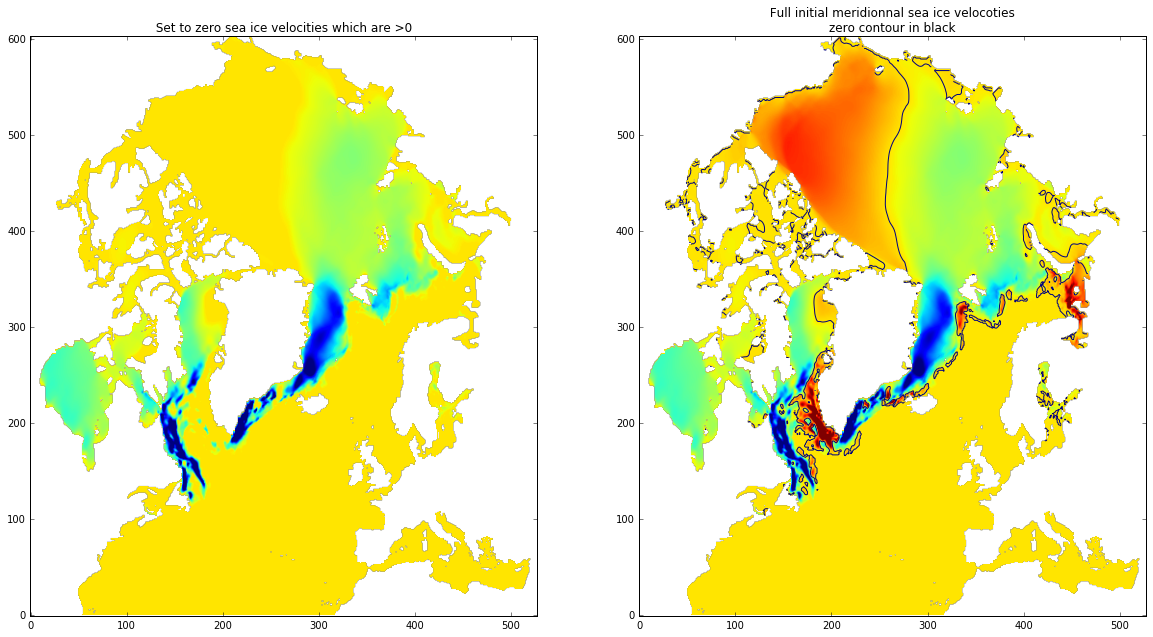

In [144]:
# To check the mask way above
plot_Vmsk=True
if plot_Vmsk:
    plt.figure(figsize=(20,15))
    plt.subplot(121)
    plt.imshow(ds_diagsI['Ref_sivelv_neg'][0,:,:],origin='lower',vmin=-0.2,vmax=0.1)
    plt.contour(ds_diagsI['Ref_sivelv_neg'][0,:,:], levels=[0.])
    plt.title(' Set to zero sea ice velocities which are >0 ')

    plt.subplot(122)
    plt.imshow(ds_RefIce['sivelv'][0,:,:],origin='lower',vmin=-0.2,vmax=0.1)
    plt.contour(ds_RefIce['sivelv'][0,:,:], levels=[0.])
    plt.title(' Full initial meridionnal sea ice velocoties \n'+ 'zero contour in black')

In [145]:
# Ref experiment Mas flux calculation sum of southward flux
# Mass flux in [kg s-1]
ds_diagsI['Ref_massflx']=ds_diagsI['Ref_sivelv_neg']*ds_RefIce['sivolu']*ds_RefIce['siconc']*rho_ice*ds_mesh_hgr['e1v'][0,:,:]


In [146]:
ds_diagsI

<xarray.Dataset>
Dimensions:         (time_counter: 432, x: 528, y: 603)
Coordinates:
  * time_counter    (time_counter) datetime64[ns] 1980-01-16T11:58:56 ... 2015-12-16T12:01:04
Dimensions without coordinates: x, y
Data variables:
    Ref_sivelv_neg  (time_counter, y, x) float32 dask.array<shape=(432, 603, 528), chunksize=(1, 603, 528)>
    Ref_massflx     (time_counter, y, x) float64 dask.array<shape=(432, 603, 528), chunksize=(1, 603, 528)>

In [147]:
!date

Mon Jan 14 15:19:54 UTC 2019


In [148]:
# Fram section of the Large FraWSC 0°E - 13°E  box to compute sea-ice export
donorth_FraSWC=True
if donorth_FraSWC:
    # northS_WSC strait location
    jloc=333 ; iloc_s=316  ;  iloc_e=339

    # Select the WSC northern section and sum
    ds_diagsI['Ref_massflx_TiSe_nFraWSC']= ds_diagsI['Ref_massflx'][:,jloc,iloc_s:iloc_e+1].sum(dim='x')

    doplot_here=False
    if doplot_here:
        # Control the time series for surface heat flux & Ice mass flux over the northern WSC box
        plt.figure(figsize=(20,15))
        ax=plt.subplot(211)   ;   ax2=plt.twinx()
        ax.plot(monthly_time,ds_diags['Ref_Qt_FraWSC_meanTiSe'], 'k', label='Qt mean')

        ax.plot(monthly_time,np.zeros(len(monthly_time)),'k--')
        ax.set_xlim(str(s_year),str(e_year+1))
        ax.set_ylim(-300.,100.)
        ax.set_ylabel('Mean Qt (W $m^{-2}$)')
        plt.title(r'Monthly mean over the FraWSC box')
        plt.grid(True)

        plt.legend(ncol=2,loc='lower left')

        col2,= ax2.plot(monthly_time,ds_diagsI['Ref_massflx_TiSe_nFraWSC']*1e-6, 'r', label=r'Ice mass flux mean')
        ax2.set_ylabel(r'Ice mass flux (10^6 kg $s^{-1}$)')
        ax2.yaxis.label.set_color(col2.get_color())
        ax2.tick_params(axis='y', colors=col2.get_color())

        # Plot over a shorter time period 
        ax=plt.subplot(212)   ;   ax2=plt.twinx()
        ax.plot(monthly_time,ds_diags['Ref_Qt_FraWSC_meanTiSe'], 'k', label='Qt mean')

        ax.plot(monthly_time,np.zeros(len(monthly_time)),'k--')
        ax.set_xlim('2000.','2005.')
        ax.set_ylabel('Mean Qt (10^6 kg $s^{-1}$)')
        ax.set_ylim(-300.,100.)
        plt.title(r'Monthly mean over the FraWSC box')
        plt.grid(True)

        plt.legend(ncol=2,loc='lower left')

        col2,= ax2.plot(monthly_time,ds_diagsI['Ref_massflx_TiSe_nFraWSC']*1e-6 , 'r', label=r'Ice mass flux mean')
        #ax2.set_ylim(0.,150.)
        ax2.set_ylabel(r'Ice mass flux (10^6 kg $s^{-1}$)')
        ax2.yaxis.label.set_color(col2.get_color())
        ax2.tick_params(axis='y', colors=col2.get_color())


In [149]:
!date

Mon Jan 14 15:19:54 UTC 2019


### NetCDF output of time-series computed over the LargeFraWSC box

In [150]:
dsout=xr.Dataset()

dsout['time']=(('time'),monthly_time)
dsout['Ref_Qt_FraWSC_meanTiSe']=(('time'),ds_diags['Ref_Qt_FraWSC_meanTiSe'])
dsout.Ref_Qt_FraWSC_meanTiSe.attrs['units']='W.m-2'
dsout['Ref_AWTmax_FraWSC_meanTiSe']=(('time'),ds_diags['Ref_AWTmax_FraWSC_meanTiSe'])
dsout.Ref_AWTmax_FraWSC_meanTiSe.attrs['units']='DegC' 
dsout['Ref_Icearea_FraWSC_meanTiSe']=(('time'),ds_diags['Ref_Icearea_FraWSC_meanTiSe']*1e-6*1e-3)
dsout.Ref_Icearea_FraWSC_meanTiSe.attrs['units']='10^3 km-2'
dsout['Ref_massflx_TiSe_nFraWSC']=(('time'),ds_diagsI['Ref_massflx_TiSe_nFraWSC'])
dsout.Ref_massflx_TiSe_nFraWSC.attrs['units']='10^6 kg.s-1'

dsout.to_netcdf('./NETCDF/BOX-LargeFraWSC/'+case_Ref+'_y'+RYEAR+'_TiSe_LargeFraWSC_Qt_AWTmax_IceArea_massflx.nc', unlimited_dims={'time':True})

In [151]:
!date

Mon Jan 14 16:53:43 UTC 2019
